<a href="https://colab.research.google.com/github/robertoricci/Curso-Data-Science-com-Python---Banco-MODAL/blob/main/Python_para_Traders_M%C3%B3dulo_03_Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Backtesting em Python

Nesta seção iremos realizar o backtesting de algumas estratégias dentro da biblioteca backtrader!

##1. Instalando bibliotecas

Iremos instalar as bibliotecas YFinance e Backtrader para realizar as análises

In [ ]:
!pip install backtrader
!pip install yfinance

##2. Importando bibliotecas

Utilizaremos:
- a biblioteca pandas e numpy para transformação dos dados;
- backtrader para realizar os backtests e métricas;
- datetime para tratar informações de tempo;-
 yfiannce para captura dos dados do mercado financeiro e 
- matplotlib para visualização dos dados


In [2]:
import pandas as pd
import backtrader as bt
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

##3. Revisando o conceito de classes

Compreender o conceito de classes é fundamental para trabalharmos com a biblioteca Backtrader uma vez que ela opera através dessa estrutura.


__init__ -> permite criar a funcionalidade inicial da classe

self -> definir as propriedades e métodos de uma instância

In [3]:
class Ativo:
    def __init__(self,ticker,setor,ohlc):
        self.ticker = str(ticker)
        self.setor = str(setor)
        self.ohlc = list(ohlc)
    pass

In [17]:
ativo1 = Ativo('PETR4','Combustíveis',[32.35,33.17,31.55,31.93])
ativo1

In [5]:
ativo1.ticker

'PETR4'

In [6]:
ativo1.ohlc[3]

31.93

In [23]:
ativo1.setor

'Combustíveis'

In [24]:
ativo2 = Ativo('ITUB4','Financeiro',[25.32,27.01,25.18,26.77])
ativo3 = Ativo('VALE3','Mineração',[80.87,82.55,80.76,82.40])
ativo2.setor == ativo3.setor

False

In [8]:
class Ativo:
    def __init__(self,ticker,setor,ohlc):
        self.ticker = str(ticker)
        self.setor = str(setor)
        self.ohlc = list(ohlc)
    
    def Amplitude(self):
        print(round((self.ohlc[1]-self.ohlc[2]),2))
    
    def Tipo(self):
        if self.ticker[-1] == '3':
            print(self.ticker,'é uma ação é do tipo ORDINÁRIA')
        elif self.ticker[-1] == '4':
            print(self.ticker,'é uma ação é do tipo PREFERENCIAL')
        elif self.ticker[-1] == '1':
            print(self.ticker,'é uma ação é do tipo UNIT')
        else:
            print('Não tenho certeza, melhor consultar o site da B3')
    
    def Resultado(self):
        resultado = (self.ohlc[3]-self.ohlc[0])
        if resultado == 0:
          print(self.ticker,'fechou estável')
        elif resultado > 0:
          print(self.ticker,'fechou em alta')
        elif resultado < 0:
          print(self.ticker,'fechou em baixa')

    def Fech_prox_max_min(self):
        media_max_min = np.mean([self.ohlc[1],self.ohlc[2]])
        if self.ohlc[3] > media_max_min:
            print(self.ticker,'parece estar em tendencia de alta')
        else:
            print(self.ticker,'parece estar em tendencia de baixa')

    pass

In [25]:
ativo1 = Ativo('PETR4','Combustíveis',[32.35,33.17,31.55,31.93])
ativo2 = Ativo('ITUB4','Financeiro',[25.32,27.01,25.18,26.77])
ativo3 = Ativo('VALE3','Mineração',[80.87,82.55,80.76,82.40])
ativo4 = Ativo('BPAC11','Financeiro',[24.17,24.77,23.70,23.89])

In [26]:
ativo1.Amplitude()

1.62


In [11]:
Ativo.Amplitude(ativo3)

1.79


In [12]:
ativo4.Tipo()

BPAC11 é uma ação é do tipo UNIT


In [13]:
ativo2.setor == ativo4.setor

True

In [14]:
ativo2.Resultado()

ITUB4 fechou em alta


In [28]:
Ativo.Fech_prox_max_min(ativo3)

VALE3 parece estar em tendencia de alta


In [27]:
ativo5 = Ativo('WEGE3','Bens_Industriais',[32.46,33.84,31.18,32.12])
Ativo.Resultado(ativo5)

WEGE3 fechou em baixa


In [39]:
datax=yf.download('PETR4.SA', '2022-06-13', '2022-06-14', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [79]:
print(datax.values[0][0])
print(datax.values[0][3])

29.020000457763672
29.270000457763672


In [75]:
ativo9 = Ativo('PETRO','Bens_Industriais',datax.values[0])

In [76]:
ativo9.Resultado()

PETRO fechou em alta


##4. Capturando dados do YFinance

Aqui iremos buscar os dados de cotações dentro do YFinance para utilizarmos na biblioteca backtrader

In [83]:
data = bt.feeds.PandasData(dataname=yf.download('PETR4.SA', '2017-01-01', '2022-06-14', auto_adjust=True))

[*********************100%***********************]  1 of 1 completed


##5. Estruturas de estratégias dentro do Backtrader

###5.1. Fundamentos

In [32]:
#Primeiramente iremos utilizar uma estrutura sugerida pela biblioteca para que você entenda como se aplica o conceito de classe dentro da estratégia e como funciona o framework do Backtrader

#Trazer a estratégia 
class PrintFechamento(bt.Strategy):

  def __init__(self):
    #criei uma variavel dataclose e deixa como referencia a linha final [0] da serie de dados
    self.dataclose = self.datas[0].close
    #criando uma função de logging para capturar a data do ultimo datapoint da minha base de dados
  def log(self, txt, dt=None):
    dt = dt or self.datas[0].datetime.date(0)
    print(f'{dt.isoformat()} {txt}') #Print data and close
    #defino o next - ele será executado toda vez que o bt chamar uma linha do db
  def next(self):
    self.log('Close, %.2f' % self.dataclose[0])


In [84]:
#inicializando cerebro
cerebro = bt.Cerebro()

#adicionando dados para backtesting
cerebro.adddata(data)

#adicionando a estrategia ao cerebro
cerebro.addstrategy(PrintFechamento)

#executando
cerebro.run()

2017-01-02 Close, 9.07
2017-01-03 Close, 9.59
2017-01-04 Close, 9.59
2017-01-05 Close, 9.74
2017-01-06 Close, 9.69
2017-01-09 Close, 9.48
2017-01-10 Close, 9.57
2017-01-11 Close, 9.69
2017-01-12 Close, 9.83
2017-01-13 Close, 9.70
2017-01-16 Close, 9.74
2017-01-17 Close, 9.78
2017-01-18 Close, 9.77
2017-01-19 Close, 9.75
2017-01-20 Close, 9.90
2017-01-23 Close, 9.89
2017-01-24 Close, 9.92
2017-01-26 Close, 9.77
2017-01-27 Close, 9.66
2017-01-30 Close, 9.18
2017-01-31 Close, 9.29
2017-02-01 Close, 9.29
2017-02-02 Close, 9.21
2017-02-03 Close, 9.49
2017-02-06 Close, 9.25
2017-02-07 Close, 9.09
2017-02-08 Close, 9.34
2017-02-09 Close, 9.31
2017-02-10 Close, 9.64
2017-02-13 Close, 9.66
2017-02-14 Close, 9.78
2017-02-15 Close, 9.80
2017-02-16 Close, 9.81
2017-02-17 Close, 9.65
2017-02-20 Close, 9.85
2017-02-21 Close, 9.95
2017-02-22 Close, 9.71
2017-02-23 Close, 9.62
2017-02-24 Close, 9.39
2017-03-01 Close, 9.60
2017-03-02 Close, 9.35
2017-03-03 Close, 9.48
2017-03-06 Close, 9.34
2017-03-07 

###5.2. Estratégia básica

Criaremos aqui uma estratégia básica de rompimento de médias simples. A ideia é que quando o preço cruze a média para cima compramos e quando preço cruzar a média para baixo, vendemos.

In [85]:
wege3=yf.download('WEGE3.SA', '2011-01-01', '2022-06-01', auto_adjust=True, interval='5d')
wege3.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [86]:
data = bt.feeds.PandasData(dataname=wege3)

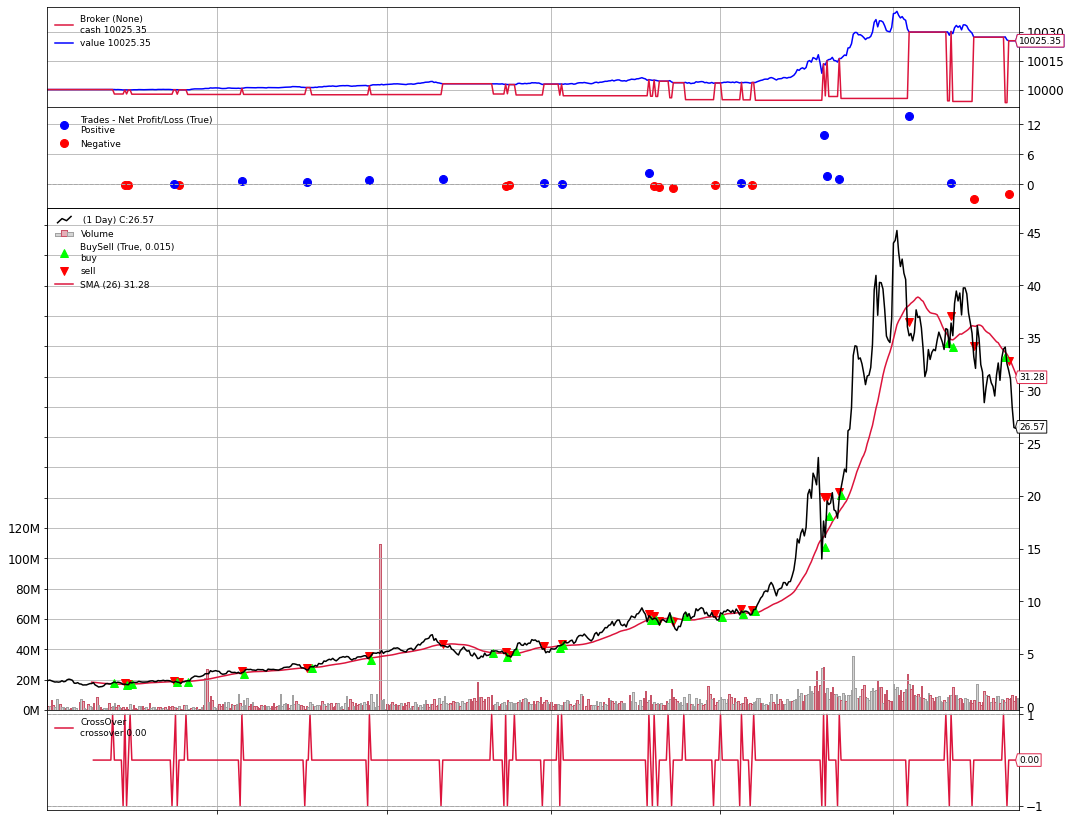

[[<Figure size 1080x864 with 5 Axes>]]

In [87]:
from backtrader.indicators import crossover

#para fazer o matplotlib rodar

%matplotlib inline 

#Teste 2

class MMACruzamento(bt.SignalStrategy):
  def __init__(self): #cria uma função que roda imediatamente quando um objeto é criado a partir dessa classe
    sma = bt.ind.SMA(period=26) #aqui você define o indicador
    price = self.data #aqui é apontador do indicador
    crossover = bt.ind.CrossOver(price,sma) #aqui é onde você define o sinal, aqui no caso é sinal de cruzamento
    self.signal_add(bt.SIGNAL_LONG, crossover) 

cerebro = bt.Cerebro()
cerebro.addstrategy(MMACruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

###5.3. Estratégia com indicador Índice de Força Relativa

In [89]:
data2 = bt.feeds.PandasData(dataname=yf.download('PETR4.SA', '2017-01-01', '2022-06-13', auto_adjust=True))

[*********************100%***********************]  1 of 1 completed


In [90]:
class RSI(bt.SignalStrategy):
  def __init__(self): #cria uma função que roda imediatamente quando um objeto é criado a partir dessa classe
    self.rsi = bt.ind.RSI() #aqui você define o indicador
  def next(self):
    if not self.position:
      if self.rsi < 45:
          self.buy(size=100)
    else:
      if self.rsi > 65:
          self.sell(size=100)

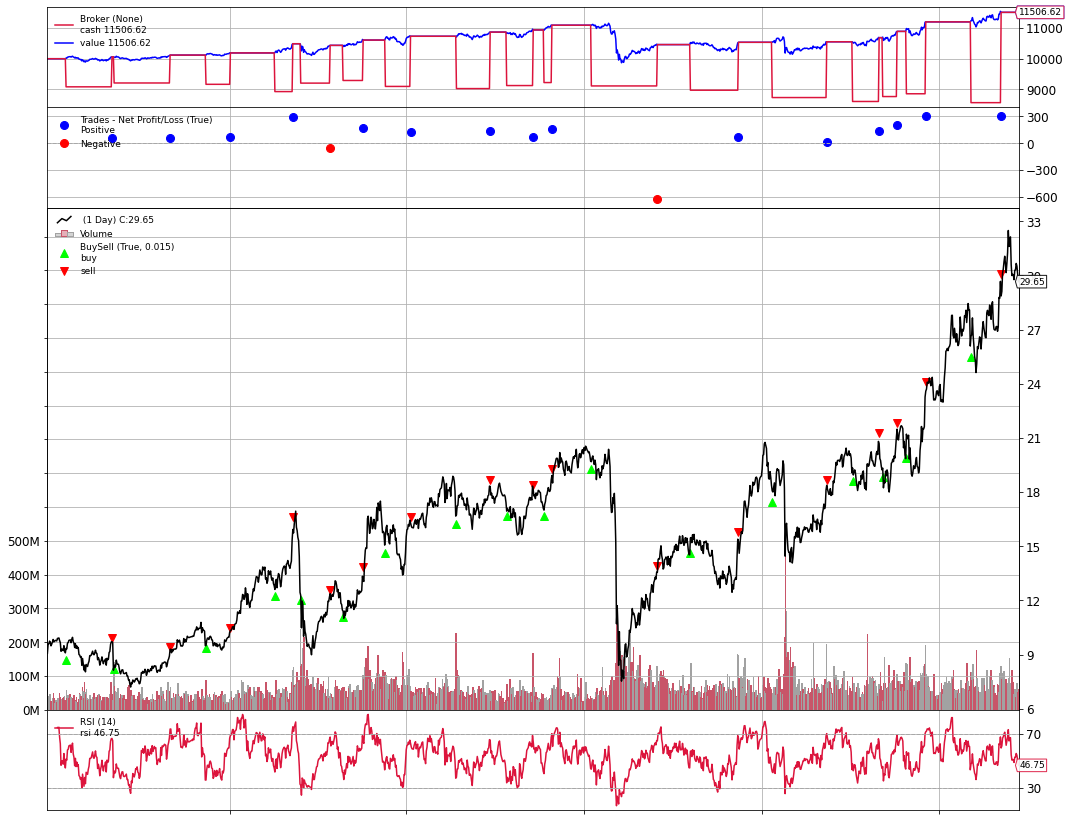

[[<Figure size 1080x864 with 5 Axes>]]

In [91]:
cerebro = bt.Cerebro()
cerebro.addstrategy(RSI)
cerebro.adddata(data2)
#cerebro.addsizer(bt.sizers.SizerFix, stake=10)#fazer a compra de 10 ações   
cerebro.run()
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

###5.4. Captando os dados da estratégia

Muitas vezes é necessário analisar o operacional linha a linha da estratégia para ver se ela está sendo executada de maneira correta, para isso utilizamos o método abaixo:

In [ ]:
class Cruzamento_Preco_MMA(bt.Strategy):
  
  params = (('MMA',9),)
  
  def __init__(self):
    sma = bt.indicators.MovingAverageSimple(self.datas[0],period=self.params.MMA)
    price = self.datas[0]
    self.crossover = bt.indicators.CrossOver(price,sma)
    self.sma = sma
    self.price = price
      
  def log(self, txt, dt=None):
    dt = self.datas[0].datetime.date(0)
    print(f'{dt}: {txt}')

  def next(self):
    if not self.position and self.crossover >0: 
      self.log('|| MMMA %.0fp = R$ %.2f || Close = R$ %.2f || Posição crossover = %.0f || (BuyAtMarket)' % ((self.params.MMA),(self.sma[0]),(self.price[0]),(self.crossover[0])))
      self.buy()
    
    elif self.crossover < 0 and self.position:
      self.sell()
      self.log('|| MMMA %.0fp = R$ %.2f || Close = R$ %.2f || Posição crossover = %.0f || (SellAtMarket)' % ((self.params.MMA),(self.sma[0]),(self.price[0]),(self.crossover[0])))


In [ ]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(Cruzamento_Preco_MMA)

## Estabelecer parâmetros do broker
cerebro.broker.setcash(10000000)
cerebro.addsizer(bt.sizers.SizerFix, stake=1)

print('Valor inicial da carteira: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Valor final da carteira: %.2f' % cerebro.broker.getvalue())

Valor inicial da carteira: 10000000.00
2017-02-08: || MMMA 9p = R$ 10.38 || Close = R$ 10.41 || Posição crossover = 1 || (BuyAtMarket)
2017-02-22: || MMMA 9p = R$ 10.88 || Close = R$ 10.82 || Posição crossover = -1 || (SellAtMarket)
2017-03-27: || MMMA 9p = R$ 9.35 || Close = R$ 9.49 || Posição crossover = 1 || (BuyAtMarket)
2017-04-12: || MMMA 9p = R$ 10.12 || Close = R$ 10.10 || Posição crossover = -1 || (SellAtMarket)
2017-04-25: || MMMA 9p = R$ 9.77 || Close = R$ 9.88 || Posição crossover = 1 || (BuyAtMarket)
2017-04-26: || MMMA 9p = R$ 9.72 || Close = R$ 9.65 || Posição crossover = -1 || (SellAtMarket)
2017-05-02: || MMMA 9p = R$ 9.62 || Close = R$ 9.64 || Posição crossover = 1 || (BuyAtMarket)
2017-05-04: || MMMA 9p = R$ 9.63 || Close = R$ 9.37 || Posição crossover = -1 || (SellAtMarket)
2017-05-05: || MMMA 9p = R$ 9.65 || Close = R$ 9.79 || Posição crossover = 1 || (BuyAtMarket)
2017-05-18: || MMMA 9p = R$ 10.21 || Close = R$ 9.06 || Posição crossover = -1 || (SellAtMarket)
2017

###5.5. Estratégia Híbrida + Indicadores

Nesta seção aprenderemos a mesclar dois indicadores na mesma estratégia e entender quais as ferramentas de análise o Backtrader nos oferece

In [ ]:
import backtrader.analyzers as btanalyzers

class rsi_media_movel(bt.Strategy):

  def __init__(self):

    self.rsi = bt.indicators.RSI(self.data.close, period=21)
    self.mm_rapida = bt.indicators.SMA(self.data.close, period=9)
    self.mm_lenta = bt.indicators.SMA(self.data.close, period=26)
    self.crossup = bt.ind.CrossUp(self.mm_rapida, self.mm_lenta)




  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.rsi > 30 and self.crossup == 1:
        self.buy(size=100)

    else: #caso a ordem já estiver aberta - condição de venda
      if self.rsi < 70:
        self.sell(size=100)
  
caixa_inicial = 30000 #definimos o montante a inicial do portfólio

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data2)
cerebro.broker.setcommission(commission=0.003) #setamos a comissão da exchange
cerebro.broker.setcash(caixa_inicial)
cerebro.addanalyzer(btanalyzers.PeriodStats, _name='stats', timeframe=bt.TimeFrame.Days)
cerebro.addanalyzer(btanalyzers.SharpeRatio_A, _name='sharpe', riskfreerate=0.12)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name='TradeAnalyzer')
cerebro.addanalyzer(btanalyzers.DrawDown, _name='drawdown')
thestrats = cerebro.run()
thestrat = thestrats[0]
print('Estatísticas:', thestrat.analyzers.stats.get_analysis())
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Sharpe Ratio:', thestrat.analyzers.sharpe.get_analysis())
print('TradeAnalyzer:', thestrat.analyzers.TradeAnalyzer.get_analysis())
print('Drawdown:', thestrat.analyzers.drawdown.get_analysis())

Estatísticas: OrderedDict([('average', -1.1676343080455536e-05), ('stddev', 0.0003730431754747359), ('positive', 18), ('negative', 22), ('nochange', 1078), ('best', 0.002149856069518563), ('worst', -0.011399038345555668)])
Final Portfolio Value: 29608.60
Sharpe Ratio: OrderedDict([('sharperatio', -18.16177288042809)])
TradeAnalyzer: AutoOrderedDict([('total', AutoOrderedDict([('total', 20), ('open', 0), ('closed', 20)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 0), ('longest', 5)])), ('lost', AutoOrderedDict([('current', 5), ('longest', 5)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', -204.10992841544322), ('average', -10.20549642077216)])), ('net', AutoOrderedDict([('total', -391.3998018635581), ('average', -19.569990093177903)]))])), ('won', AutoOrderedDict([('total', 8), ('pnl', AutoOrderedDict([('total', 238.15147614285), ('average', 29.76893451785625), ('max', 76.80150520661837)]))])), ('lost', AutoOrderedDict([('total', 12), ('pnl',

In [ ]:
caixa_inicial = 30000

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data)
cerebro.broker.setcommission(commission=0.003) #taxa da exchange
cerebro.broker.setcash(caixa_inicial)
cerebro.addanalyzer(btanalyzers.PeriodStats, _name='stats')
cerebro.addanalyzer(btanalyzers.SharpeRatio_A, _name='sharpe', riskfreerate=0.1275)
cerebro.addanalyzer(btanalyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(btanalyzers.Returns, _name='returns')
thestrats = cerebro.run()
thestrat = thestrats[0]
print('Returns:', thestrat.analyzers.returns.get_analysis())
print('Estatísticas:', thestrat.analyzers.stats.get_analysis())
print('Sharpe Ratio:', thestrat.analyzers.sharpe.get_analysis())
print('Drawdown:', thestrat.analyzers.drawdown.get_analysis())
print('Valor Final Portfolio: %.2f' % cerebro.broker.getvalue())

##5.6. In and Out-of-Sample

Nesse momento iremos testar a estratégia em dois períodos diferentes para avaliar se performance se mantem estável

In [ ]:
#Construir os parâmetros da estratégia

ativo = 'PETR4.SA'
intervalo = '1d'
rapida = 21 
lenta = 100
janela_rsi = 21

#Parâmetros Backtrader
df_ativo=yf.download(ativo, '2010-01-01', '2020-01-01', auto_adjust=True, interval=intervalo)
df_ativo.dropna(inplace=True)
data2 = bt.feeds.PandasData(dataname=df_ativo)



In [ ]:
class cruzamento_mm_rsi(bt.Strategy):

  def __init__(self):

    self.rsi = bt.indicators.RSI(self.data.close, period=janela_rsi)
    self.mm_venda = bt.indicators.SMA(self.data.close, period=venda)
    self.mm_rapida = bt.indicators.SMA(self.data.close, period=rapida)
    self.mm_lenta = bt.indicators.SMA(self.data.close, period=lenta)
    self.crossup = bt.ind.CrossUp(self.mm_rapida, self.mm_lenta)
    self.crossup_venda = bt.ind.CrossDown(self.mm_venda, self.mm_rapida)





  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.crossup == 1:
        self.buy(size=100)

    else: #caso a ordem já estiver aberta - condição de venda
      if self.rsi > 65:
        self.sell(size=100)
  

cerebro = bt.Cerebro()
cerebro.addstrategy(cruzamento_mm_rsi)
cerebro.adddata(data2)
cerebro.run()
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

In [ ]:
#Teste de robustez

ativo = 'PETR4.SA'
intervalo = '1d'
df_ativo=yf.download(ativo, '2020-02-01', '2022-03-01', auto_adjust=True, interval=intervalo)
df_ativo.dropna(inplace=True)
data2 = bt.feeds.PandasData(dataname=df_ativo)
venda = 7
rapida = 21 
lenta = 100
janela_rsi = 21

In [ ]:
import backtrader.analyzers as btanalyzers

class rsi_media_movel(bt.Strategy):

  def __init__(self):

    self.rsi = bt.indicators.RSI(self.data.close, period=janela_rsi)
    self.mm_venda = bt.indicators.SMA(self.data.close, period=venda)
    self.mm_rapida = bt.indicators.SMA(self.data.close, period=rapida)
    self.mm_lenta = bt.indicators.SMA(self.data.close, period=lenta)
    self.crossup = bt.ind.CrossUp(self.mm_rapida, self.mm_lenta)
    self.crossup_venda = bt.ind.CrossDown(self.mm_venda, self.mm_rapida)





  def next(self):
    if not self.position: #se não tiver alguma ordem aberta - condição de compra
      if self.crossup == 1:
        self.buy(size=100)

    else: #caso a ordem já estiver aberta - condição de venda
      if self.rsi > 65:
        self.sell(size=100)
  
caixa_inicial = 30000 #definimos o montante a inicial do portfólio

cerebro = bt.Cerebro()
cerebro.addstrategy(rsi_media_movel)
cerebro.adddata(data2)
cerebro.run()
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)